# MARKET PRICE INDICIES ANALYSIS

LOADING AND PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('C:\\Users\\pc\\Downloads\\Data for Case Study.csv')

In [2]:
data.head()

Date Index Category        Sub Category       Region   Plow    Index   \
0  1/1/2018         Cement  Cement Price Index  Appalachian   31.52   100.00   
1  2/1/2018         Cement  Cement Price Index  Appalachian   31.01   100.75   
2  3/1/2018         Cement  Cement Price Index  Appalachian   30.35   100.87   
3  4/1/2018         Cement  Cement Price Index  Appalachian   29.61   100.57   
4  5/1/2018         Cement  Cement Price Index  Appalachian   28.80   102.17   

    Phigh               type  
0   158.35  Normalized Price  
1   159.21  Normalized Price  
2   161.99  Normalized Price  
3   160.39  Normalized Price  
4   160.23  Normalized Price

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4524 entries, 0 to 4523
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4524 non-null   object 
 1   Index Category  4524 non-null   object 
 2   Sub Category    4524 non-null   object 
 3   Region          4524 non-null   object 
 4    Plow           4524 non-null   float64
 5    Index          4524 non-null   float64
 6    Phigh          4524 non-null   float64
 7   type            4524 non-null   object 
dtypes: float64(3), object(5)
memory usage: 282.9+ KB


In [4]:
data.isnull().sum()

Date              0
Index Category    0
Sub Category      0
Region            0
 Plow             0
 Index            0
 Phigh            0
type              0
dtype: int64

In [5]:
data.describe()

Plow        Index        Phigh 
count  4524.000000  4524.000000  4524.000000
mean     78.355802   103.623691   140.714052
std      23.198859    33.392147    58.592580
min      19.510000    38.790000    40.850000
25%      65.332500    90.932500   111.257500
50%      80.585000   100.730000   127.565000
75%      92.610000   112.372500   157.832500
max     201.440000   522.150000   768.100000

# Exploratory Analysis

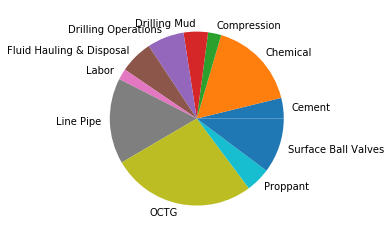

In [6]:
%matplotlib inline
import matplotlib.pyplot as plot
index_total=data.groupby(['Index Category'])[' Index '].sum()
index_total.plot(kind="pie", label="")
#plot.legend()
plot.show()

Here in the pie chart we can see the OCTG has higher cost in the index price trend highest peak for the transportation of pipes and casing tubing of line pipes

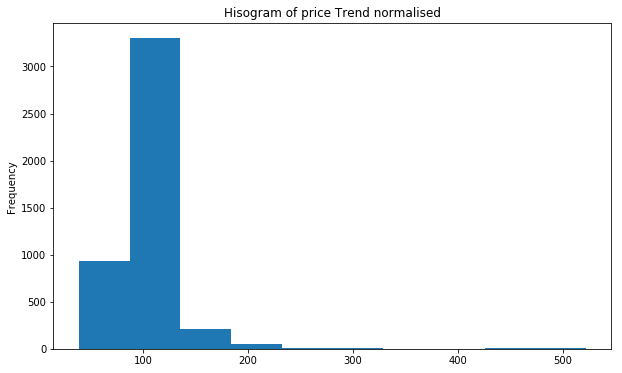

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df_close = data[' Index ']
df_close.plot(style='k.',kind='hist')
plt.title('Hisogram of price Trend normalised')
plt.show()

The distribution in the bar chart indicates the index column follows a normal distribution and the price indices is in the range of somewhere near 20 minimum price range to max of 320 in the first half also in the next half there are some price values which are from 500 range this gives pretty much distributed plot

In [8]:
corr=data.corr()
sns.heatmap(data.corr(),annot = True)

while finding correlation for numeric variables in the dataset there is high correlation or relationship between Phigh and Index gives 0.84 correlated among both varaiables which will be helpful for  feature selection

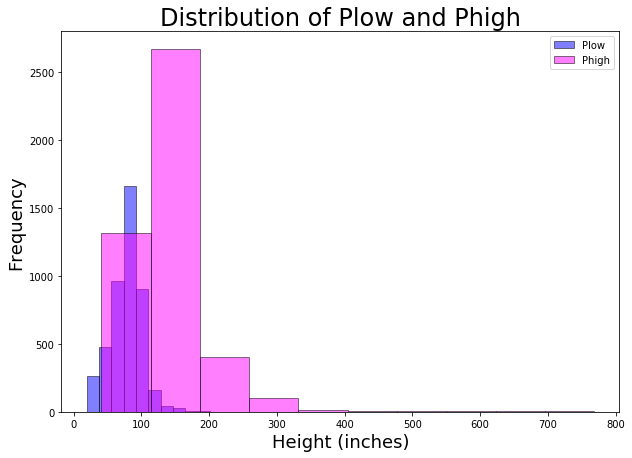

In [9]:
data[' Plow '].plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
data[' Phigh '].plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Plow', 'Phigh'])
plt.title('Distribution of Plow and Phigh', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);

The distribution shows Plow the lowest price index or 25th percentile value and Phigh  the highest price index or 75th perentile value which looks quite favourable for the market price 

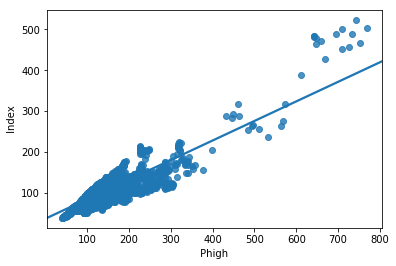

In [10]:
x=data[' Phigh ']
y=data[' Index ']
sns.regplot(x ,
            y , 
            ci = None,
            data = data)



Since Phigh and Index has high correlation checking if it is a fitted plot and are able to plot the data points correctly it shows 90% percent of the data points are fitting against the linear scale line the residuals diverts from range 600.

In [11]:
df2=data.groupby(['Region'])[' Index '].sum()
#f2['Region']=data.groupby(data['Region'], as_index=False)[' Index '].sum()
df2.plot(x="Region", y=" Index ", kind="bar", rot=5, fontsize=10)


In [12]:
df2=data.groupby(['Region'])[' Index '].sum()
#df2['Region']=data.groupby(data['Region'], as_index=False)[' Index '].mean()
df2

Region
Appalachian    197167.76
Permian        271625.82
Name:  Index , dtype: float64

This plot shows that The price variation in the Appalachian is much smaller than the Permian

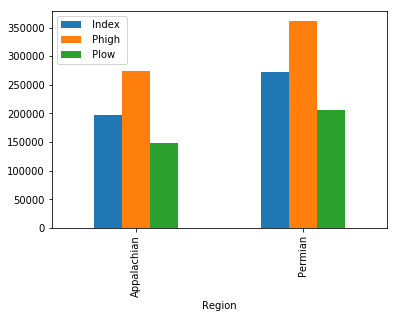

In [13]:
data.groupby(['Region']).sum().plot(
    kind='bar', y=[' Index ',' Phigh ',' Plow '])

The plot all numeric price index shows there might be wider variation in the permian price index

In [14]:
data.index=pd.to_datetime(data['Date'], format='%m/%d/%Y')
data.groupby(by=[data.index.month]).sum().plot(
    kind='bar', y=[' Index ',' Phigh ',' Plow '])

This plot shows all the months in each years from 2018 to 2022 how it ranges from the indices we calso see in the first half months of every year there is high cost price paid than rest of the last months in a year grouping by regions this maybe due to do peak marketing period in the year 

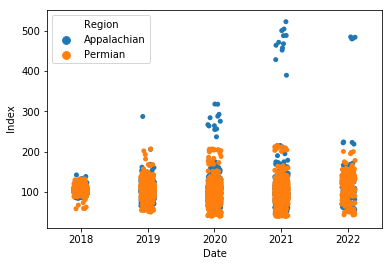

In [15]:
from matplotlib.dates import DateFormatter
import seaborn as sns
data.index=pd.to_datetime(data['Date'], format='%m/%d/%Y')


sns.stripplot(x=data.index.year, y=' Index ', hue='Region',data=data)


There are some outliers or residuals in the plot which comes from Appalachian basin this maybe because of fewer supplier options in their activity

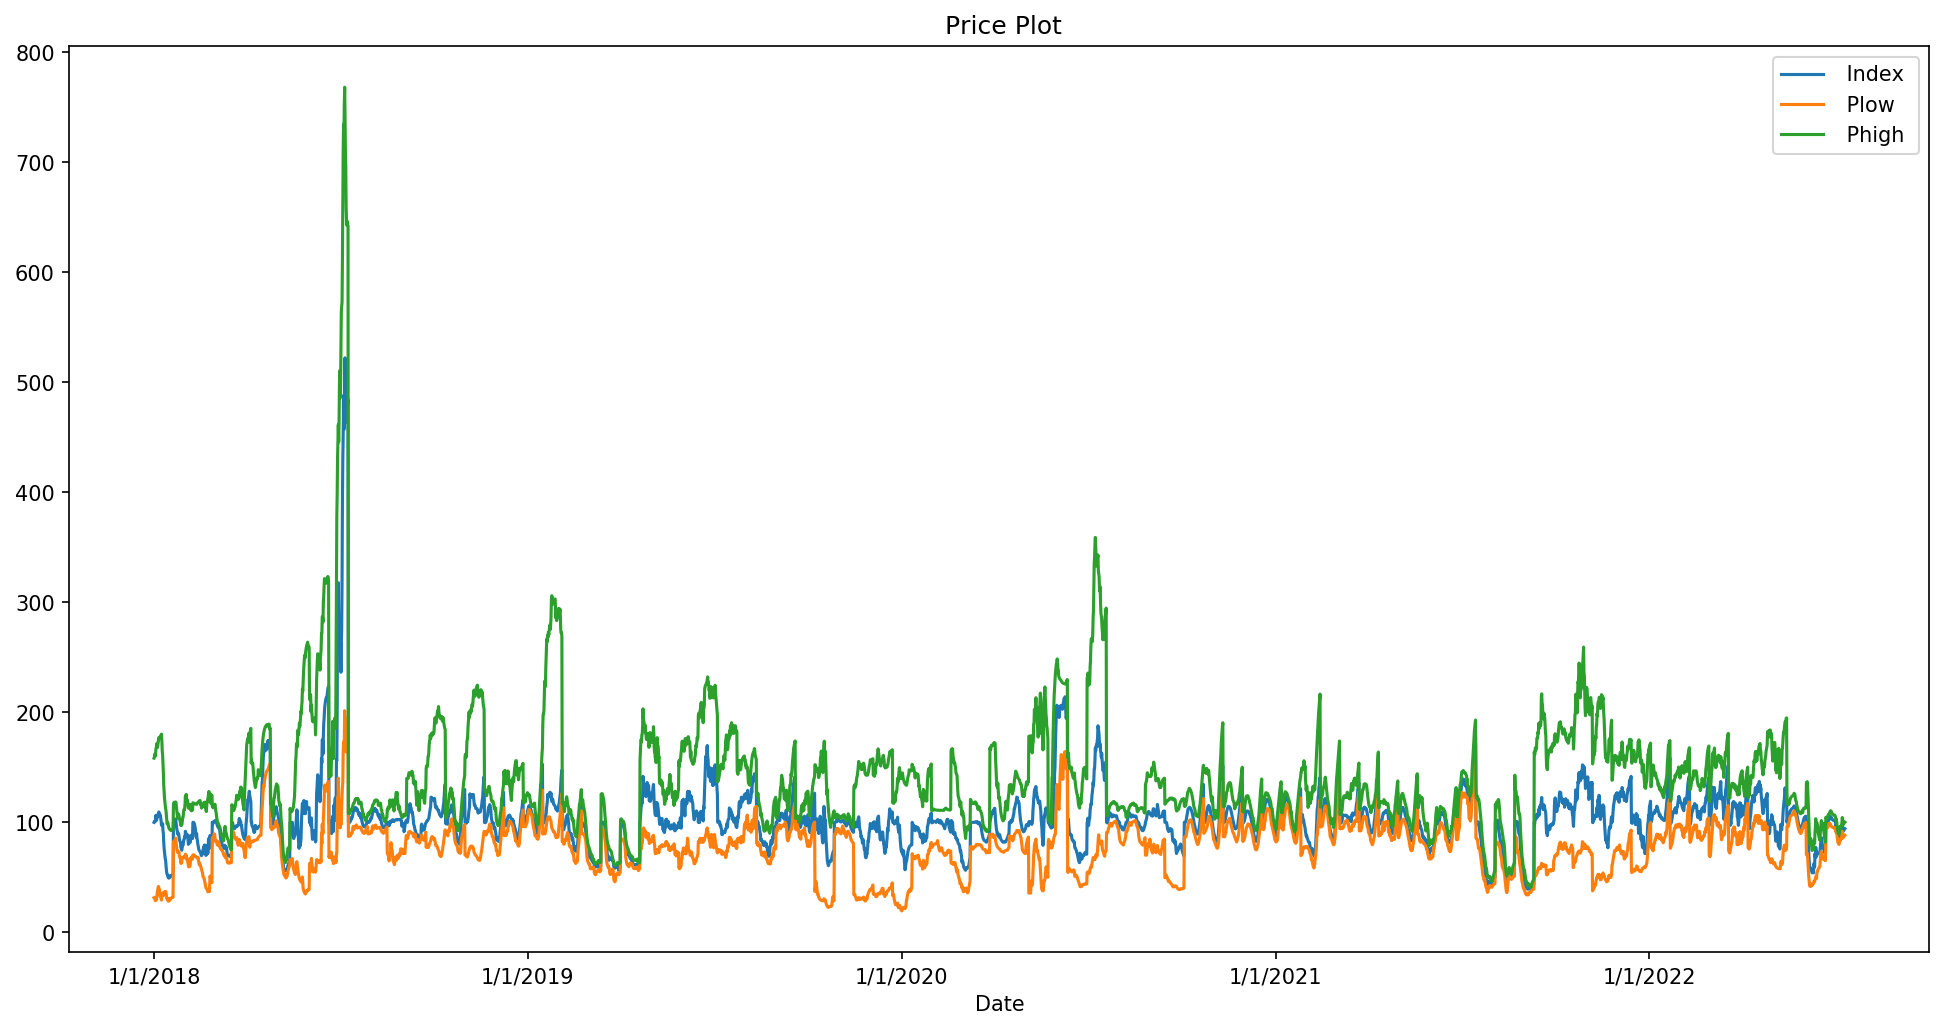

In [16]:
pd.to_datetime(data['Date'])
data['Date']=data.set_index('Date', inplace=True)
plt.figure(figsize=(16, 8), dpi=150)
  

data[' Index '].plot(label=' Index ')
data[' Plow '].plot(label=' Plow ')
data[' Phigh '].plot(label=' Phigh ')
  
# adding title to the plot
plt.title(' Price Plot')
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()

we can see there is a spike high and lows in every year but this doesnt much affect the overall pricing stratagies as it follows a stationary trend in future the market price indicies might follow the same pattern.

# Using Clusters to find new group trends

Since in the analysis we find out that the relationship between index and Phigh column has high level of dependency condesring that

In [17]:
x=pd.DataFrame(data, columns = [' Index ', ' Phigh '])

In [18]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [19]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 1, ..., 0, 0, 0])

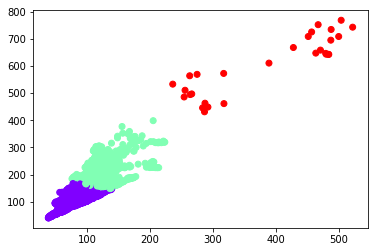

In [20]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters[' Index '],data_with_clusters[' Phigh '],c=data_with_clusters['Clusters'],cmap='rainbow')

In the above plot shows the common group of clusters differentiated between index and phigh we can see a vast level commonalities among it and the scatter plot follows linearity.

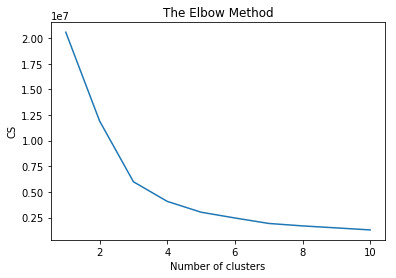

In [21]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

The elbow plot shows taking the number of clusters as 3 gives a better understanding of groupings and themes associated within the data

Also while building the model i have assumed 'index' as fixed monthly median price of all the prices for a category in a given region for particular date column and 'Phigh' as the highest price followed by 'plow' the lowest price of that date.

# Preprocessing data and Feature extraction

In [22]:
df = data[' Index '].values
df = df.reshape(-1, 1)

/*The reshape allows you to add dimensions or change the number of elements in each dimension. We are using reshape(-1, 1) because we have just one dimension in our array, so numby will create the same number of our rows and add one more axis: 1 to be the second dimension.*/

In [23]:
#Now let’s split the data into training and testing sets:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [24]:
#We will use the MinMaxScaler to scale our data between zero and one. 
from sklearn.preprocessing import MinMaxScaler 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [25]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [26]:
#For the features (x), we will append the last 50 Index prices, and for the label (y), we will append the next Index price. Then we will use numpy to convert it into an array.

In [27]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [28]:
#Now we are going to create our training and testing data by calling our function for each one:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# MODEL BUILDING Using LSTM

In [29]:
#Next, we need to reshape our data to make it a 3D array in order to use it in LSTM Layer.
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

First, we initialized our model as a sequential one with 96 units in the output’s dimensionality. We used return_sequences=True to make the LSTM layer with three-dimensional input and input_shape to shape our dataset.

Making the dropout fraction 0.2 drops 20% of the layers. Finally, we added a dense layer with a value of 1 because we want to output one value.

In [30]:
#After that, we want to reshape our feature for the LSTM layer, because it is sequential_3 which is expecting 3 dimensions, not 2:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [31]:
#Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

We used loss='mean_squared_error' because it is a regression problem, and the adam optimizer to update network weights iteratively based on training data.

In [32]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('price_prediction.h5')

Epoch 1/50
112/112 [==============================] - 8s 73ms/step - loss: 0.0041
Epoch 2/50
112/112 [==============================] - 8s 72ms/step - loss: 0.0025
Epoch 3/50
112/112 [==============================] - 9s 80ms/step - loss: 0.0019
Epoch 4/50
112/112 [==============================] - 9s 83ms/step - loss: 0.0018
Epoch 5/50
112/112 [==============================] - 9s 84ms/step - loss: 0.0021
Epoch 6/50
112/112 [==============================] - 9s 84ms/step - loss: 0.0014
Epoch 7/50
112/112 [==============================] - 9s 84ms/step - loss: 0.0014
Epoch 8/50
112/112 [==============================] - 10s 88ms/step - loss: 0.0013
Epoch 9/50
112/112 [==============================] - 10s 85ms/step - loss: 0.0012
Epoch 10/50
112/112 [==============================] - 9s 84ms/step - loss: 0.0011
Epoch 11/50
112/112 [==============================] - 9s 85ms/step - loss: 7.1943e-04: 0s - loss
Epoch 12/50
112/112 [==============================] - 9s 84ms/step - loss: 8.1

Every epoch refers to one cycle through the full training dataset, and batch size refers to the number of training examples utilized in one iteration.

In [33]:
model = load_model('price_prediction.h5')

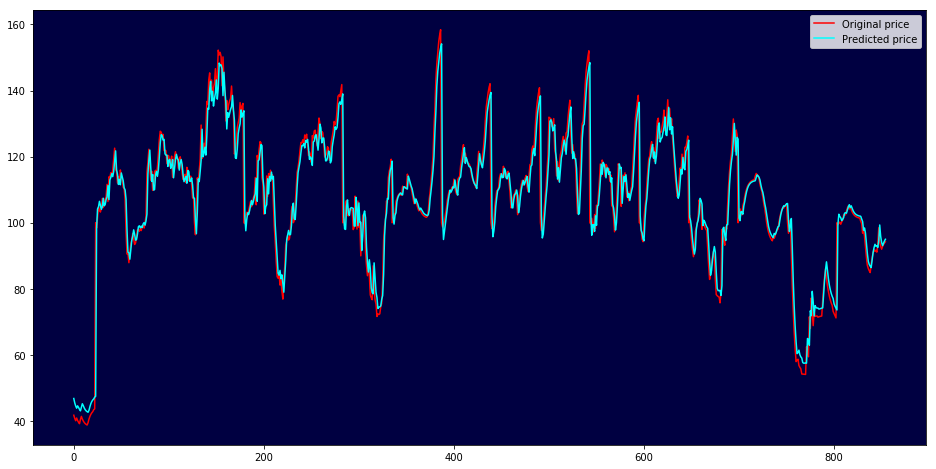

In [34]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

# Conclusion

To conclude,The predicted price trend result works very good along the original price in future this market price index strategy can have a huge influence on having a balanced perspective